# Sam Garg

In [77]:
import pandas as pd
df = pd.read_csv('/Users/sambhavgarg/Desktop/DATA301/project-group24-project/FIFA-21 Complete.csv' , delimiter=';')
df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


## Research question/interests
-What is the effect of age of players on the number of hits?

## Milestone 3
In this Milestone we will analyse, clean and manipulate data 

## Task 1
## Exploratory Data Analysis

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Number of rows and columns:", df.shape)
print("Columns:", df.columns)

Number of rows and columns: (17981, 9)
Columns: Index(['player_id', 'name', 'nationality', 'position', 'overall', 'age',
       'hits', 'potential', 'team'],
      dtype='object')


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,17981.0,220912.660531,27738.072671,41.0,204881.0,226753.0,241587.0,256469.0
overall,17981.0,67.274345,5.924392,56.0,63.0,67.0,71.0,94.0
age,17981.0,26.311440,4.556077,17.0,23.0,26.0,30.0,43.0
hits,17981.0,2.689450,10.846286,0.0,0.0,0.0,2.0,371.0
potential,17981.0,71.738057,5.961968,57.0,67.0,71.0,76.0,95.0


In [80]:
df.describe(include='object').T

,count,unique,top,freq
name,17981,17701,Paulinho,8
nationality,17981,162,England,1496
position,17981,232,CB,2296
team,17981,713,Free Agents,211


In [81]:
# Check for duplicates and clean data of redundant values
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Average age is mostly in 20s


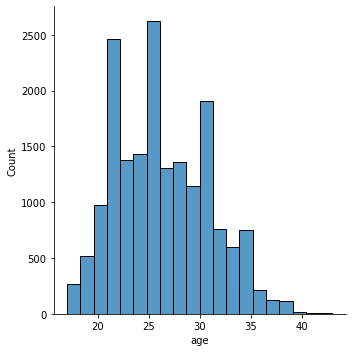

In [82]:
print("Average age is mostly in 20s")
sns.displot(df['age'], kde=False, bins=20)

Most Players have hits between 0 and 50 


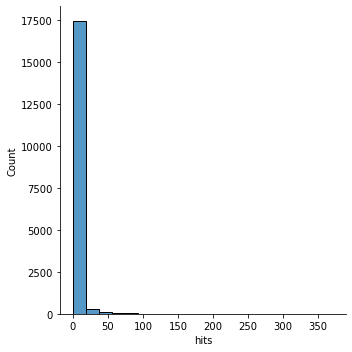

In [83]:
print("Most Players have hits between 0 and 50 ")
sns.displot(df['hits'], kde=False, bins=20)

As age is increasing, the number of average hits reduce


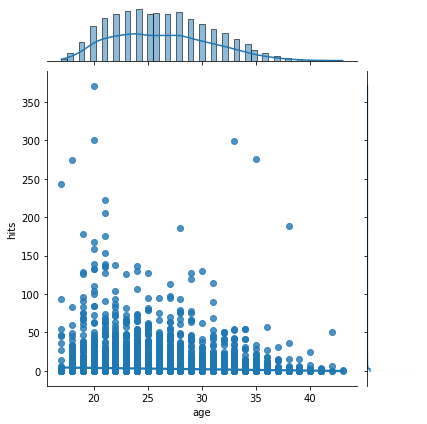

In [84]:
print("As age is increasing, the number of average hits reduce")
sns.jointplot(x='age', y='hits', data=df, kind='reg')

In [85]:
import project_functions2 as p2

In [86]:
dfa = p2.unprocessed('/Users/sambhavgarg/Desktop/DATA301/project-group24-project/FIFA-21 Complete.csv')
dfa

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [87]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/sambhavgarg/Desktop/DATA301/project-group24-project/FIFA-21 Complete.csv' , delimiter=';')
df1=(df.copy().drop(["player_id","nationality","team","potential"],axis=1).sort_values("overall", ascending = False).reset_index(drop=True)
        ) 
    
conditions = [
(df['overall'] >= 85),
(df['overall'] < 85) & (df['overall'] >=70),
(df['overall'] < 70)
]
values = ['Gold', 'Silver', 'Bronze']
df1['Rating'] = np.select(conditions, values)
        
df2=(df1.copy().rename(columns={"potential": "potential growth"}))
df2

,name,position,overall,age,hits,Rating
0,Lionel Messi,ST|CF|RW,94,33,299,Gold
1,Cristiano Ronaldo,ST|LW,93,35,276,Gold
2,Neymar Jr,CAM|LW,92,28,186,Gold
3,Virgil van Dijk,CB,91,29,127,Gold
4,Jan Oblak,GK,91,27,47,Gold
...,...,...,...,...,...,...
17976,Hassan Al Shamrani,CB|CDM,56,29,0,Bronze
17977,Erland Tangvik,GK,56,23,0,Bronze
17978,Ruvira,GK,56,20,0,Bronze
17979,Juan Camilo Suárez,CB,56,21,0,Bronze


## Task 4:
## Analysis

In [88]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,17981.0,67.274345,5.924392,56.0,63.0,67.0,71.0,94.0
age,17981.0,26.311440,4.556077,17.0,23.0,26.0,30.0,43.0
hits,17981.0,2.689450,10.846286,0.0,0.0,0.0,2.0,371.0


In [89]:
df2.describe(include='object').T

,count,unique,top,freq
name,17981,17701,Paulinho,8
position,17981,232,CB,2296
Rating,17981,3,Bronze,12030


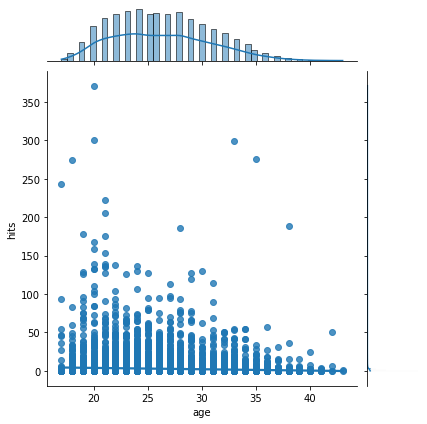

In [90]:
sns.jointplot(x='age', y='hits', data=df2, kind='reg')

Analysis
- The average age is 26 years old 
- The average hits are 3 after rounding-off
- The youngest player is 17 years old while the oldest is 43
- The lowest hits are 0 as evident from the graph as well
- The highest number of hits are 371
- Out of the 17891 players we have the avg hits are very low due to most of them being zero
- As the age increases the frequency of hits are lower which means most of the hits are coming from players aged in early 20s
- Majority of the players have a low overall rating since the most frequent is Bronze

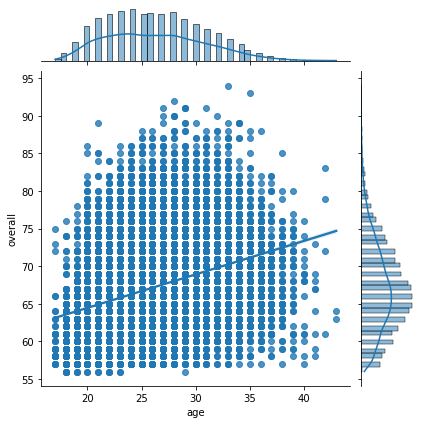

In [91]:
sns.jointplot(x='age', y='overall', data=df2, kind='reg')

- The above graph is very scattered and shows how overall is not very dependent on age
- Although the graph also shows that players below 20 have a lower rating since they are new to the game
- The curve a slight peak between 25 and 30 and it is unimodal



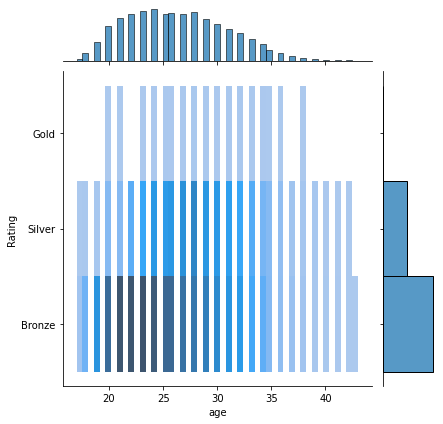

In [92]:
sns.jointplot(x='age', y='Rating', data=df2, kind='hist')

Most of the Gold players are 25-25 years old
whereas most bronze players are in their early 20s